In [1]:
import nltk
import re
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
# Figures inline and set visualization style
%matplotlib inline
sns.set(style="whitegrid", palette='husl')

# First part

#### Reads a txt file from the system and visualises the frequency of specific words

In [49]:
f = open('/Users/astrid/PycharmProjects/PDF_Download/pdfs_2017.txt').read()
type(f)

str

In [54]:
# Create tokenizer
tokenizer = RegexpTokenizer('female|women|girl|girls|gender')

In [55]:
# Create tokens
tokens = tokenizer.tokenize(f)
#tokens[:8]

In [58]:
# Initialize new list
words = []

# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())


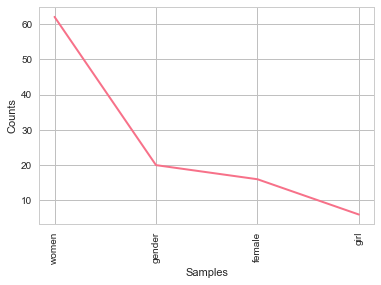

In [90]:
# Create freq dist and plot
freqdist1 = nltk.FreqDist(words)
freqdist1.plot()

# Second part

#### Reads directly from a list of PDF files and extracts the text into a variable from which then the code visualises the frequency of specific words

In [7]:
import PyPDF2
my_file='/Users/astrid/Downloads/Emma/2016/Benin 2015 Article IV ConsultationPress Release Staff Report and Statement by the Executive Director for Benin.pdf'
pdfFileObj = open(my_file,'rb') 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pdfReader.numPages

70

In [43]:
for i in range(6 , 19 ):  
    pageObj = pdfReader.getPage(i)
    page = pageObj.extractText()
    #print(page)
    

In [46]:
import glob, os
os.chdir("/Users/astrid/Downloads/Emma/2016")

# create a list to store each converted pdf
final_text =''

# convert each pdf into text page by page
# Acces each pdf and reads it using pyPDF2
for file in glob.glob("*.pdf"):
    my_file= '/Users/astrid/Downloads/Emma/2016/'+file
    my_text=''
    try:
        pdfFileObj = open(my_file,'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)                
        #print(pdfReader.numPages)
        #print('/Users/astrid/Downloads/Emma/2016/'+file)
    except:
        #print("Error: Not a PDF")
        continue
    # acces each page inside a pdf and extracts text from each page...
    # defined in the range
    for i in range(6 , pdfReader.numPages):
        pageObj = pdfReader.getPage(i)
        page = pageObj.extractText()
        my_text = ' '.join([my_text,page])
    final_text = ' '.join([final_text,page])
print(final_text)    


 The construction of the major gas pipeline TAP has just been launched some days ago.
 The feasibility study for the project of gasification system connected with TAP is expected to be 
presented by October. Fiscal risks linked to the energy sector have considerably declined. In 2015 the SOE energy producer KESH has been able to pay its current and outstanding tax obligations and to cover energy imports with 
its own resources. Defaults hours have been reduced by two thirds between 2013 and 2015; further improvements in efficiency in generation 
are expected from self-financed
 investments amounting to 1.3
 billion. The removal of 35kV 
medium-voltage consumers from regulated tariff sy
stem is within reach and the collection rate 
from budgetary institutions is close to 100 percent.
 Investments in the core
 transport network has been prioritized by the creation of a Single Sector Project Pipeline 
which includes national priority projects aimed at improving connectivity
 within the co

In [47]:
type(final_text)

str

In [48]:
# Create tokenizer
tokenizer = RegexpTokenizer('female|women|girl|girls|gender')

In [50]:
# Create tokens
tokens = tokenizer.tokenize(final_text)
#tokens[:8]

In [51]:
# Initialize new list
words = []

# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())

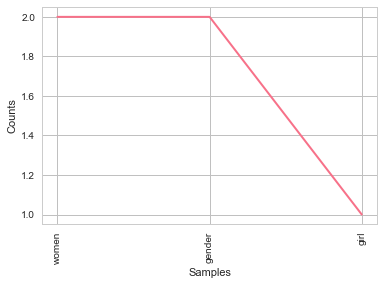

In [52]:
# Create freq dist and plot
freqdist1 = nltk.FreqDist(words)
freqdist1.plot()

In [70]:
# Create another tokenizer
tokenizer_2 = RegexpTokenizer('[a-z]+')
# Create tokens
tokens_2 = tokenizer_2.tokenize(final_text)


In [71]:
# Initialize new list
words = []

# Loop through list tokens and make lower case
for word in tokens_2:
    words.append(word.lower())
    
    
sw = nltk.corpus.stopwords.words('english')

    
# Initialize new list
words_ns = []# ns as in 'no stop' words 


# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)



# Print several list items as sanity check
words_ns[:5]
    

['construction', 'major', 'gas', 'pipeline', 'launched']

In [72]:
# Import stopwords from sklearn
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

# Add sklearn stopwords to words_sw
sw = set(sw + list(ENGLISH_STOP_WORDS)) # 'ENGLISH_STOP_WORDS' isn't a list it's a set, a frozen set.
# in the previous line we make the 'ENGLISH_STOP_WORDS' a list and make the new 'sw' a set in order to have only unique values

# Initialize new list
words_ns =[]

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

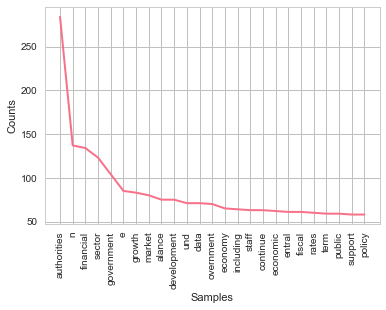

In [73]:
# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)